# Predictions & simulations - Project 1
## Report created by Artem Beregovskykh, Joanna Mateuszczyk, Juliusz Pronobis-Szczylik, Wenjiao Zhou


### Importing libraries

In [39]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
%matplotlib inline

### Importing data
*Place for explanation if needed*

In [49]:
df1 = pd.read_csv('C:/Users/asia/Downloads/Predictions&simulations II/Spain stock index(^IBEX)_EUR.csv', parse_dates=['Date'])
df2 = pd.read_csv('C:/Users/asia/Downloads/Predictions&simulations II/USDJPY_JPY.csv', parse_dates=['Date'])

In [51]:
df1

,Date,IBEX
0,2000-01-01,11641.400390
1,2000-02-01,10840.000000
2,2000-03-01,12585.799810
3,2000-04-01,11935.000000
4,2000-05-01,11569.200200
...,...,...
276,2023-01-01,8297.900391
277,2023-02-01,9048.000000
278,2023-03-01,9419.299805
279,2023-04-01,9217.799805


In [53]:
df2

,Date,USD/JPY
0,2000-01-01,102.180000
1,2000-02-01,107.190002
2,2000-03-01,110.070000
3,2000-04-01,102.940002
4,2000-05-01,108.120003
...,...,...
276,2023-01-01,131.110001
277,2023-02-01,130.110001
278,2023-03-01,136.348007
279,2023-04-01,132.770004


In [54]:
# Check the data type of the 'Date' column
print(df1.dtypes)
print(df2.dtypes)

Date    datetime64[ns]
IBEX           float64
dtype: object
Date       datetime64[ns]
USD/JPY           float64
dtype: object


### Plotting
*Place for explaining steps*

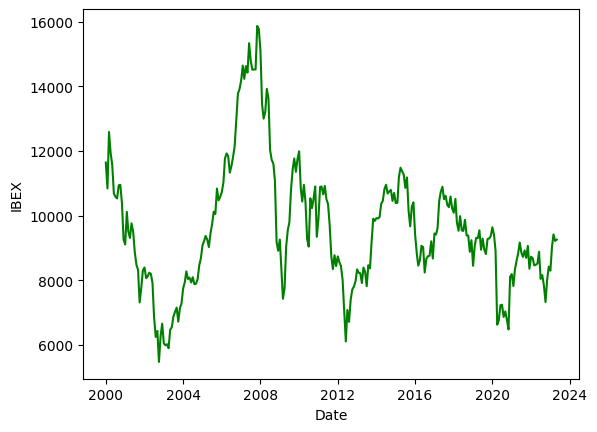

In [44]:
sns.lineplot(x="Date", y="IBEX", data=df1, color='green')
plt.show()

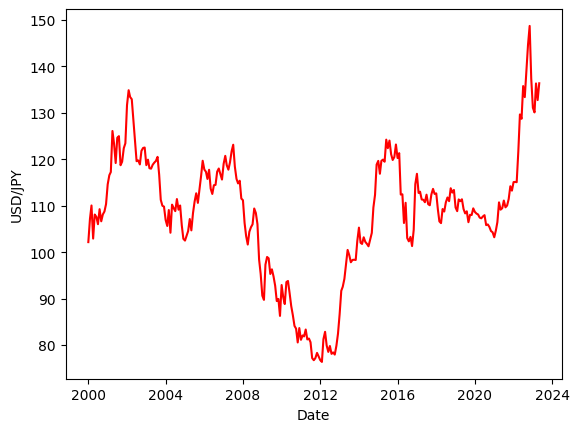

In [55]:
sns.lineplot(x="Date", y="USD/JPY", data=df2, color='red')
plt.show()

### Stationary tests
*Place for explaining steps*

In [46]:
# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df1['IBEX'])
print('ADF Statistic: ', adf_result[0])
print('p-value: ', adf_result[1])
print('Critical Values: ', adf_result[4])


ADF Statistic:  -2.5727847848258962
p-value:  0.09875355884152848
Critical Values:  {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}


In [47]:
# Perform the Phillips-Perron (PP) test
pp_result = kpss(df1['IBEX'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.22753379246068223
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\Users\asia\anaconda3\envs\snowflake\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [56]:
# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df2['USD/JPY'])
print('ADF Statistic: ', adf_result[0])
print('p-value: ', adf_result[1])
print('Critical Values: ', adf_result[4])


ADF Statistic:  -1.7162993148528476
p-value:  0.42273474932130023
Critical Values:  {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}


In [57]:
# Perform the Phillips-Perron (PP) test
pp_result = kpss(df2['USD/JPY'])
print('PP Statistic: ', pp_result[0])
print('p-value: ', pp_result[1])
print('Critical Values: ', pp_result[3])

PP Statistic:  0.36935283946038233
p-value:  0.09036515540500761
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


### Transformations and new tests - if needed
* Example: In this example, we load the monthly price index dataset into a Pandas DataFrame and visualize the data with a line plot. The ADF test and the PP test are then performed on the original series to determine if it is stationary or not. If the series is non-stationary, we take the first difference of the series and visualize the transformed data with another line plot. The ADF test and the PP test are then performed on the transformed series to confirm its stationarity.

* The ADF test checks whether the null hypothesis of a unit root (i.e., non-stationarity) exists in the series. If the p-value of the test is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that the series is stationary.

In [ ]:
#Example
# If the series is non-stationary, make relevant transformations to obtain stationary data
#diff = df['index'].diff().dropna()
# Visualize the transformed data with a line plot
#plt.plot(diff)
#plt.xlabel('Date')
#plt.ylabel('Index Difference')
#plt.title('Monthly Index Difference')
#plt.show()

# Perform the Augmented Dickey-Fuller (ADF) test on the transformed data
#adf_result_diff = adfuller(diff)
#print('ADF Statistic (Diff): ', adf_result_diff[0])
#print('p-value (Diff): ', adf_result_diff[1])
#print('Critical Values (Diff): ', adf_result_diff[4])

# Perform the Phillips-Perron (PP) test on the transformed data
#pp_result_diff = kpss(diff)
#print('PP Statistic (Diff): ', pp_result_diff[0])
#print('p-value (Diff): ', pp_result_diff[1])
#print('Critical Values (Diff): ', pp_result_diff[3])


*Place for some ending comments*